In [ ]:
# Importing the full MC data frames for Run 1 and Run 3
run1MCDf = pd.read_csv("mc_run1_1Np_NuMI.csv")
run3MCDf = pd.read_csv("mc_run3_1Np_NuMI.csv")
# The POT is really similar in the nue MC (2% difference)
potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

In [ ]:
# I am interested in understanding if I predict a different event rate for FHC and RHC 
# I I roughly have the same POT (which I do in the MC)

run1Nue    = run1MCDf.query("nu_pdg == 12")
run3Nue    = run3MCDf.query("nu_pdg == 12")

print("nue energy"    ,stats.ks_2samp(run1Nue["nu_e"], run3Nue["nu_e"]))
print("nue tune"      ,stats.ks_2samp(run1Nue["weightSplineTimesTuneTimesPPFX"], run3Nue["weightSplineTimesTuneTimesPPFX"]))

n1, bins, patches = plt.hist(run1Nue["nu_e"], 25,range=(0,6),weights=run1Nue['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
n3, bins, patches = plt.hist(run3Nue["nu_e"], 25,range=(0,6),weights=run3Nue['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")
plt.show()

potRun1 = 1.
potRun3 = 2.5931/2.5392

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1)
menStdN3     = potRun3*np.sqrt(n3)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1, marker="o" ,  markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3, marker="o" ,  markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True Neutrino Energy')
ax.set_ylabel('Event / POT')
ax.set_title('Run1-Run3 Neutrino comparison')
#plt.xlim(0, 4)
#ax.set_ylim(0, 5500)
ax.grid(True)
ax.legend()

fig.tight_layout()
fig.savefig("../plots/NeutrinoPreSel.pdf")



In [ ]:
run1NueBar = run1MCDf.query("nu_pdg == -12")
run3NueBar = run3MCDf.query("nu_pdg == -12")
print("antinue energy",stats.ks_2samp(run1NueBar["nu_e"], run3NueBar["nu_e"]))
print("antinue tune"  ,stats.ks_2samp(run1NueBar["weightSplineTimesTuneTimesPPFX"], run3NueBar["weightSplineTimesTuneTimesPPFX"]))

n1Bar, bins, patches = plt.hist(run1NueBar["nu_e"], 25,range=(0,6),weights=run1NueBar['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="FHC MC")
n3Bar, bins, patches = plt.hist(run3NueBar["nu_e"], 25,range=(0,6),weights=run3NueBar['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="RHC MC")
plt.show()

potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1Bar)
menStdN3     = potRun3*np.sqrt(n3Bar)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1Bar, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1Bar, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3Bar, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3Bar, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True AntiNeutrino Energy')
ax.set_ylabel('Event / POT')
ax.set_title('Run1-Run3 AntiNeutrino comparison')
#plt.xlim(0, 4)
#ax.set_ylim(0, 1500)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/AntiNeutrinoPreSel.pdf")

In [ ]:
# Let's Repeat this dance for the selected events... 
run1MCDfSel   = pd.read_csv("mc_Sel_run1_1Np_NuMI.csv")
run3MCDfSel   = pd.read_csv("mc_Sel_run3_1Np_NuMI.csv")
run1NueSel    = run1MCDfSel.query("nu_pdg == 12")
run3NueSel    = run3MCDfSel.query("nu_pdg == 12")
run1NueBarSel = run1MCDfSel.query("nu_pdg == -12")
run3NueBarSel = run3MCDfSel.query("nu_pdg == -12")

n1SelNue, bins, patches = plt.hist(run1NueSel["nu_e"], 25,range=(0,6),weights=run1NueSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run1")
n3SelNue, bins, patches = plt.hist(run3NueSel["nu_e"], 25,range=(0,6),weights=run3NueSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run3")

potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1SelNue)
menStdN3     = potRun3*np.sqrt(n3SelNue)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1SelNue, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1SelNue, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3SelNue, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3SelNue, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True Neutrino Energy')
ax.set_ylabel('Selected Events ')
ax.set_title('Run1-Run3 Neutrino Comparison \n After 1eNp Selection')
#plt.xlim(0, 4)
#ax.set_ylim(0, 0.3e-19)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/Neutrino1eNpSel.pdf")

plt.show()

n1SelNueBar, bins, patches = plt.hist(run1NueBarSel["nu_e"], 25,range=(0,6),weights=run1NueBarSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run1")
n3SelNueBar, bins, patches = plt.hist(run3NueBarSel["nu_e"], 25,range=(0,6),weights=run3NueBarSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run3")

potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1SelNueBar)
menStdN3     = potRun3*np.sqrt(n3SelNueBar)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1SelNueBar, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1SelNueBar, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3SelNueBar, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3SelNueBar, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True AntiNeutrino Energy')
ax.set_ylabel('Selected Events / POT')
ax.set_title('Run1-Run3 AntiNeutrino Comparison \n After 1eNp Selection')
#plt.xlim(0, 4)
#ax.set_ylim(0, 0.5e-20)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/AntiNeutrino1eNpSel.pdf")

In [ ]:
# Let's calculate some ratio
rRun1Nue1eNp    = np.divide(n1SelNue, n1, out=np.zeros_like(n1SelNue), where=n1!=0)
rRun3Nue1eNp    = np.divide(n3SelNue, n3, out=np.zeros_like(n3SelNue), where=n3!=0)
rRun1NueBar1eNp = np.divide(n1SelNueBar, n1Bar, out=np.zeros_like(n1SelNueBar), where=n1!=0)
rRun3NueBar1eNp = np.divide(n3SelNueBar, n3Bar, out=np.zeros_like(n3SelNueBar), where=n1!=0)

errrRun1Nue1eNp    = calculateErrorBar(n1SelNue, n1)
errrRun3Nue1eNp    = calculateErrorBar(n3SelNue, n3)
errrRun1NueBar1eNp = calculateErrorBar(n1SelNueBar, n1Bar)
errrRun3NueBar1eNp = calculateErrorBar(n3SelNueBar, n3Bar)



fig, ax = plt.subplots()
ax.plot(bincenters, rRun1Nue1eNp, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.plot(bincenters, rRun3Nue1eNp, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
ax.bar (bincenters, rRun1Nue1eNp, width=width,  yerr=errrRun1Nue1eNp, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
ax.bar (bincenters, rRun3Nue1eNp, width=width,  yerr=errrRun3Nue1eNp, alpha=0.75,fill=False,ecolor='b',edgecolor='w')



ax.set_xlabel('True Neutrino Energy')
ax.set_ylabel('NueCC Efficiency')
ax.set_title('Run1-Run3 Neutrino Comparison \n 1eNp Selection Efficiency')
#plt.xlim(0, 4)
ax.grid(True)
ax.legend()
fig.tight_layout()
#fig.savefig("../plots/1eNpSelEfficiencyNeutrino.pdf")

fig, ax = plt.subplots()
ax.plot(bincenters, rRun1NueBar1eNp, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.plot(bincenters, rRun3NueBar1eNp, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
ax.bar (bincenters, rRun1NueBar1eNp, width=width,  yerr=errrRun1NueBar1eNp, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
ax.bar (bincenters, rRun3NueBar1eNp, width=width,  yerr=errrRun3NueBar1eNp, alpha=0.75,fill=False,ecolor='b',edgecolor='w')

ax.set_xlabel('True AntiNeutrino Energy')
ax.set_ylabel('NueCC Efficiency')
ax.set_title('Run1-Run3 AntiNeutrino Comparison \n 1eNp Selection Efficiency')
#plt.xlim(0, 4)
ax.grid(True)
ax.legend()
fig.tight_layout()
#fig.savefig("../plots/1eNpSelEfficiencyAntiNeutrino.pdf")


In [ ]:
# Let's Repeat this dance for the selected events of the 1e0p
run1MCDfSel   = pd.read_csv("mc_Sel_run1_1e0p_NuMI.csv")
run3MCDfSel   = pd.read_csv("mc_Sel_run3_1e0p_NuMI.csv")
run1NueSel    = run1MCDfSel.query("nu_pdg == 12")
run3NueSel    = run3MCDfSel.query("nu_pdg == 12")
run1NueBarSel = run1MCDfSel.query("nu_pdg == -12")
run3NueBarSel = run3MCDfSel.query("nu_pdg == -12")

n1SelNue0p, bins, patches = plt.hist(run1NueSel["nu_e"], 25,range=(0,6),weights=run1NueSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run1")
n3SelNue0p, bins, patches = plt.hist(run3NueSel["nu_e"], 25,range=(0,6),weights=run3NueSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run3")

potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1SelNue0p)
menStdN3     = potRun3*np.sqrt(n3SelNue0p)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1SelNue0p, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1SelNue0p, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3SelNue0p, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3SelNue0p, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True Neutrino Energy')
ax.set_ylabel('Selected Events ')
ax.set_title('Run1-Run3 Neutrino Comparison \n After 1e0p Selection')
#plt.xlim(0, 4)
#ax.set_ylim(0, 0.8e-20)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/Neutrino1e0pSel.pdf")

plt.show()

n1SelNueBar0p, bins, patches = plt.hist(run1NueBarSel["nu_e"], 25,range=(0,6),weights=run1NueBarSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run1")
n3SelNueBar0p, bins, patches = plt.hist(run3NueBarSel["nu_e"], 25,range=(0,6),weights=run3NueBarSel['weightSplineTimesTuneTimesPPFX'], alpha=0.75, label="run3")

potRun1 = 1.
potRun3 = 2.5931e+22/2.5392e+22

bincenters = 0.5*(bins[1:]+bins[:-1])
width      = (bins[1:]-bins[:-1])
menStdN1     = potRun1*np.sqrt(n1SelNueBar0p)
menStdN3     = potRun3*np.sqrt(n3SelNueBar0p)

fig, ax = plt.subplots()
ax.bar (bincenters, potRun1*n1SelNueBar0p, width=width,  yerr=menStdN1, alpha=0.75, fill=False,edgecolor='none',ecolor='r')
ax.plot(bincenters, potRun1*n1SelNueBar0p, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.bar (bincenters, potRun3*n3SelNueBar0p, width=width,  yerr=menStdN3, alpha=0.75,  fill=False,edgecolor='none',ecolor='b')
ax.plot(bincenters, potRun3*n3SelNueBar0p, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")

ax.set_xlabel('True AntiNeutrino Energy')
ax.set_ylabel('Selected Events')
ax.set_title('Run1-Run3 AntiNeutrino Comparison \n After 1e0p Selection')
#plt.xlim(0, 4)
#ax.set_ylim(0, 0.5e-20)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/AntiNeutrino1e0pSel.pdf")

In [ ]:
# Let's calculate some ratio
rRun1Nue1e0p    = np.divide(n1SelNue0p, n1, out=np.zeros_like(n1SelNue), where=n1!=0)
rRun3Nue1e0p    = np.divide(n3SelNue0p, n3, out=np.zeros_like(n3SelNue), where=n3!=0)
print(bincenters.shape, n1Bar.shape)
rRun1NueBar1e0p = np.divide(n1SelNueBar0p, n1Bar, out=np.zeros_like(n1SelNue), where=n1!=0)
rRun3NueBar1e0p = np.divide(n3SelNueBar0p, n3Bar, out=np.zeros_like(n3SelNue), where=n3!=0)


errrRun1Nue1e0p = calculateErrorBar(n1SelNue0p, n1)
errrRun3Nue1e0p = calculateErrorBar(n3SelNue0p, n3)
errrRun1NueBar1e0p = calculateErrorBar(n1SelNueBar0p, n1Bar)
errrRun3NueBar1e0p = calculateErrorBar(n3SelNueBar0p, n3Bar)


'''
errNueRun1 = calculateErrorBar(n1SelNue0p, n1)
errNueRun3 = calculateErrorBar(n3SelNue0p, n3)
errNueRunBar1 = calculateErrorBar(n1SelNueBar0p, n1)
errNueRunBar3 = calculateErrorBar(n3SelNueBar0p, n3)
'''


fig, ax = plt.subplots()
ax.plot(bincenters, rRun1Nue1e0p, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.plot(bincenters, rRun3Nue1e0p, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
ax.bar (bincenters, rRun1Nue1e0p, width=width,  yerr=errrRun1Nue1e0p, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
ax.bar (bincenters, rRun3Nue1e0p, width=width,  yerr=errrRun3Nue1e0p, alpha=0.75,fill=False,ecolor='b',edgecolor='w')

ax.set_xlabel('True Neutrino Energy')
ax.set_ylabel('NueCC Efficiency')
ax.set_title('Run1-Run3 Neutrino Comparison \n 1e0p Selection Efficiency')
#plt.xlim(0, 4)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/1e0pSelEfficiencyNeutrino.pdf")

fig, ax = plt.subplots()
ax.plot(bincenters, rRun1NueBar1e0p, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
ax.plot(bincenters, rRun3NueBar1e0p, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
ax.bar (bincenters, rRun1NueBar1e0p, width=width,  yerr=errrRun1NueBar1e0p, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
ax.bar (bincenters, rRun3NueBar1e0p, width=width,  yerr=errrRun3NueBar1e0p, alpha=0.75,fill=False,ecolor='b',edgecolor='w')


ax.set_xlabel('True AntiNeutrino Energy')
ax.set_ylabel('NueCC Efficiency')
ax.set_title('Run1-Run3 AntiNeutrino Comparison \n 1e0p Selection Efficiency')
#plt.xlim(0, 4)
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/1e0pSelEfficiencyAntiNeutrino.pdf")


In [ ]:
# Alright, let do this for data and (unfortunately) reco energy
run1DataDf = pd.read_csv("run1_Sel_1Np_NuMI.csv")
run3DataDf = pd.read_csv("run3_Sel_1Np_NuMI.csv")

run1Run3DataRatio = 2./5.
run3DataDf["norm"] = run1Run3DataRatio
n1Data1eNp, bins1, patches1 = plt.hist(run1DataDf["reco_e"], 25,range=(0,10), alpha=0.75, label="run1")
n3Data1eNp, bins3, patches3 = plt.hist(run3DataDf["reco_e"], 25,range=(0,10), alpha=0.75, weights = run3DataDf["norm"], label="run3")
plt.xlim(0, 4)
plt.show()


bincenters = 0.5*(bins1[1:]+bins1[:-1])
width      = (bins1[1:]-bins1[:-1])
print(width)
menStdN1     = np.sqrt(n1Data1eNp)
menStdN3     = run1Run3DataRatio*(np.sqrt(n3Data1eNp))
plt.bar(bincenters, n1Data1eNp, width=width,  yerr=menStdN1, alpha=0.75, label="run1",fill=False,)
plt.bar(bincenters, n3Data1eNp, width=width,  yerr=menStdN3, alpha=0.75, label="run3",fill=False,edgecolor='r',ecolor='r')

plt.xlabel('reco_e')
plt.ylabel('frequency')
plt.title('reco_e')
plt.xlim(0, 4)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.legend()
#plt.show()


print(stats.ks_2samp(run1DataDf["reco_e"], run3DataDf["reco_e"]))


fig, ax = plt.subplots()
plt.bar(bincenters, n1Data1eNp, width=width,  yerr=menStdN1, alpha=0.75, color="r", fill=False,)
plt.bar(bincenters, n3Data1eNp, width=width,  yerr=menStdN3, alpha=0.75, color="b",fill=False)
ax.errorbar(bincenters, n1Data1eNp, yerr=menStdN1, marker="o",markersize=4., linestyle="",  color="g",label="Run 1")
ax.errorbar(bincenters, n3Data1eNp, yerr=menStdN3, marker="o",markersize=4., linestyle="",  color="m",label="Run 3")

ax.set_xlabel('Reco 1eNp Candidate Reco Energy [GeV]')
ax.set_ylabel('Candidates in 2e20 POT')
ax.set_title('Data Run1-Run3 1eNp Comparison')
plt.xlim(0, 4)
ax.grid(False)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/Data1eNp.pdf")

In [ ]:
# Alright, let do this for data and (unfortunately) reco energy
run1DataDf0 = pd.read_csv("run1_Sel_1e0p_NuMI.csv")
run3DataDf0 = pd.read_csv("run3_Sel_1e0p_NuMI.csv")

run1Run3DataRatio = 2./5.
run3DataDf0["norm"] = run1Run3DataRatio
n1Data1e0p, bins1, patches1 = plt.hist(run1DataDf0["reco_e"], 25,range=(0,10), alpha=0.75, label="run1")
n3Data1e0p, bins3, patches3 = plt.hist(run3DataDf0["reco_e"], 25,range=(0,10), alpha=0.75, weights = run3DataDf0["norm"], label="run3")
plt.xlim(0, 4)
plt.show()

bincenters = 0.5*(bins1[1:]+bins1[:-1])
width      = (bins1[1:]-bins1[:-1])
menStdN1     = np.sqrt(n1Data1e0p)
menStdN3     = run1Run3DataRatio*(np.sqrt(n3Data1e0p))
plt.bar(bincenters, n1Data1e0p, width=width,  yerr=menStdN1, alpha=0.75, label="run1",fill=False,)
plt.bar(bincenters, n3Data1e0p, width=width,  yerr=menStdN3, alpha=0.75, label="run3",fill=False,edgecolor='r',ecolor='r')


plt.xlabel('reco_e')
plt.ylabel('frequency')
plt.title('reco_e')
plt.xlim(0, 4)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.legend()
#plt.show()


print(stats.ks_2samp(run1DataDf["reco_e"], run3DataDf["reco_e"]))


fig, ax = plt.subplots()
plt.bar(bincenters, n1Data1e0p, width=width,  yerr=menStdN1, alpha=0.75, color="r", fill=False,)
plt.bar(bincenters, n3Data1e0p, width=width,  yerr=menStdN3, alpha=0.75, color="b",fill=False)
ax.errorbar(bincenters, n1Data1e0p, yerr=menStdN1, marker="o",markersize=4., linestyle="",  color="g",label="Run 1")
ax.errorbar(bincenters, n3Data1e0p, yerr=menStdN3, marker="o",markersize=4., linestyle="",  color="m",label="Run 3")

ax.set_xlabel('Reco 1e0p Candidate Reco Energy [GeV]')
ax.set_ylabel('Candidates in 2e20 POT')
ax.set_title('Data Run1-Run3 1e0p Comparison')
plt.xlim(0, 4)
ax.grid(False)
ax.legend()
fig.tight_layout()
fig.savefig("../plots/Data1e0p.pdf")

In [ ]:
'''    
print (run1DataDf.columns)
res_v  = []
pval_v = []
for c in run1DataDf.columns:
    res, pval = stats.ks_2samp(run1DataDf[c], run3DataDf[c])
    res_v .append(res)
    pval_v.append(pval)
    print(res)

    print(c,pval)
    n, bins, patches = plt.hist(run1DataDf[c], 25, density=True, alpha=0.75, label="run1")
    n, bins, patches = plt.hist(run3DataDf[c], 25, density=True, alpha=0.75, label="run3")
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.title(c)
    plt.grid(True)
    plt.legend()
    plt.show()




n, bins, patches = plt.hist(pval_v, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('pval')
plt.ylabel('frequency')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt
import numpy as np

n, bins, patches = plt.hist( res_v, 50, density=False, facecolor='g', alpha=0.75)
plt.xlabel('res')
plt.ylabel('frequency')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(run1DataDf["_opfilter_pe_beam"], 25,range=(0,10000), density=True, alpha=0.75, label="run1")
n, bins, patches = plt.hist(run3DataDf["_opfilter_pe_beam"], 25,range=(0,10000), density=True, alpha=0.75, label="run3")


plt.xlabel('_opfilter_pe_beam')
plt.ylabel('frequency')
plt.title('_opfilter_pe_beam')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.legend()
plt.show()
'''
    

# We're been playing so far. Start here

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import math
def calculateRatioErrorBar (num, den):
    if den:
        if num/(den*den)*(1-num/den) > 0:
            return math.sqrt(num/(den*den)*(1-num/den)   )
    return 0
    
def calculateErrorBar (num, den):
    errors = []
    for i,s in enumerate(num):
        errors.append(calculateRatioErrorBar (num[i], den[i]))
    return errors

In [3]:
def ratioPlots(n1,n1Sel,n3,n3Sel,bins1,interaction="interaction"):
    ratioRun1    = np.divide(n1Sel, n1, out=np.zeros_like(n1SelNue), where=n1!=0)
    ratioRun3    = np.divide(n3Sel, n3, out=np.zeros_like(n1SelNue), where=n1!=0)

    bincenters = 0.5*(bins1[1:]+bins1[:-1])
    width      = (bins1[1:]-bins1[:-1])
    
    errrRun1    = calculateErrorBar(n1Sel, n1)
    errrRun3    = calculateErrorBar(n3Sel, n3)

    
    fig, ax = plt.subplots()
    ax.plot(bincenters, ratioRun1, marker="o",markersize=4., linestyle="",  color="r",label="FHC MC")
    ax.plot(bincenters, ratioRun3, marker="o",markersize=4., linestyle="",  color="b",label="RHC MC")
    ax.bar (bincenters, ratioRun1, width=width,  yerr=errrRun1, alpha=0.75,fill=False,ecolor='r',edgecolor='w')
    ax.bar (bincenters, ratioRun3, width=width,  yerr=errrRun3, alpha=0.75,fill=False,ecolor='b',edgecolor='w')

    ax.set_xlabel('True Nu Energy [GeV]')
    ax.set_ylabel('Eff')
    ax.legend()
    fig.tight_layout()
    fig.savefig("../plots/"+interaction+"_eff.pdf")
    plt.show()
    
    
def histoPlot(s1,s3,w1,w3,interaction,tag):
    fig, ax = plt.subplots()
    n1_0, bins, patches = ax.hist(s1, 25,range=(0,6),weights=w1, alpha=0.75, label="FHC MC")
    n3_0, bins, patches = ax.hist(s3, 25,range=(0,6),weights=w3, alpha=0.75, label="RHC MC")
    ax.set_xlabel('True Nu Energy [GeV]')
    ax.set_ylabel('Counts')
    ax.set_title('Run1-Run3 '+interaction+' '+tag+'')
    ax.legend()
    fig.tight_layout()
    fig.savefig("../plots/"+interaction+"_"+tag+"_PreSel.pdf")
    return n1_0, n3_0, bins

In [4]:
def allRatio(run1CSV,run1SelCSV,run3CSV,run3SelCSV,nuType = "nue"):
    # I am interested in understanding if I predict a different event rate for FHC and RHC 
    # I I roughly have the same POT (which I do in the MC)
    r1     = pd.read_csv(run1CSV)
    r11eNp = pd.read_csv(run1SelCSV)
    r3     = pd.read_csv(run3CSV)
    r31eNp = pd.read_csv(run3SelCSV)
    print(r1.columns, r11eNp.columns,r3.columns, r31eNp.columns)
    print("All")
    n1   , n3   , bins = histoPlot(r1["nu_e"]    ,r3["nu_e"]    ,r1["weightSplineTimesTuneTimesPPFX"]    ,r3["weightSplineTimesTuneTimesPPFX"]    ,"All","PreSel"+nuType)
    n1Sel, n3Sel, bins = histoPlot(r11eNp["nu_e"],r31eNp["nu_e"],r11eNp["weightSplineTimesTuneTimesPPFX"],r31eNp["weightSplineTimesTuneTimesPPFX"],"All","PostSel"+nuType)
    ratioPlots(n1,n1Sel,n3,n3Sel,bins,"All"+nuType)

    r1_int0  = r1.query("interaction == 0")
    r1_int1  = r1.query("interaction == 1")
    r1_int2  = r1.query("interaction == 2")
    r1_int3  = r1.query("interaction == 3")
    r1_int10 = r1.query("interaction == 10")

    r3_int0  = r3.query("interaction == 0")
    r3_int1  = r3.query("interaction == 1")
    r3_int2  = r3.query("interaction == 2")
    r3_int3  = r3.query("interaction == 3")
    r3_int10 = r3.query("interaction == 10")

    r1_Sel_int0  = r11eNp.query("interaction == 0")
    r1_Sel_int1  = r11eNp.query("interaction == 1")
    r1_Sel_int2  = r11eNp.query("interaction == 2")
    r1_Sel_int3  = r11eNp.query("interaction == 3")
    r1_Sel_int10 = r11eNp.query("interaction == 10")

    r3_Sel_int0  = r31eNp.query("interaction == 0")
    r3_Sel_int1  = r31eNp.query("interaction == 1")
    r3_Sel_int2  = r31eNp.query("interaction == 2")
    r3_Sel_int3  = r31eNp.query("interaction == 3")
    r3_Sel_int10 = r31eNp.query("interaction == 10")

    print("QE")
    n1_0   , n3_0   , bins = histoPlot(r1_int0["nu_e"]    ,r3_int0["nu_e"]    ,r1_int0["weightSplineTimesTuneTimesPPFX"]    ,r3_int0["weightSplineTimesTuneTimesPPFX"]    ,"QE","PreSel"+nuType)
    n1Sel_0, n3Sel_0, bins = histoPlot(r1_Sel_int0["nu_e"],r3_Sel_int0["nu_e"],r1_Sel_int0["weightSplineTimesTuneTimesPPFX"],r3_Sel_int0["weightSplineTimesTuneTimesPPFX"],"QE","PostSel"+nuType)
    ratioPlots(n1_0,n1Sel_0,n3_0,n3Sel_0,bins,"QE"+nuType)

    print("RES")
    n1_1   , n3_1   , bins = histoPlot(r1_int1["nu_e"]    ,r3_int1["nu_e"]    ,r1_int1["weightSplineTimesTuneTimesPPFX"]    ,r3_int1["weightSplineTimesTuneTimesPPFX"]    ,"RES","PreSel"+nuType)
    n1Sel_1, n3Sel_1, bins = histoPlot(r1_Sel_int1["nu_e"],r3_Sel_int1["nu_e"],r1_Sel_int1["weightSplineTimesTuneTimesPPFX"],r3_Sel_int1["weightSplineTimesTuneTimesPPFX"],"RES","PostSel"+nuType)
    ratioPlots(n1_1,n1Sel_1,n3_1,n3Sel_1,bins,"RES"+nuType)

    print("DIS")
    n1_2   , n3_2   , bins = histoPlot(r1_int2["nu_e"]    ,r3_int2["nu_e"]    ,r1_int2["weightSplineTimesTuneTimesPPFX"]    ,r3_int2["weightSplineTimesTuneTimesPPFX"]    ,"DIS","PreSel"+nuType)
    n1Sel_2, n3Sel_2, bins = histoPlot(r1_Sel_int2["nu_e"],r3_Sel_int2["nu_e"],r1_Sel_int2["weightSplineTimesTuneTimesPPFX"],r3_Sel_int2["weightSplineTimesTuneTimesPPFX"],"DIS","PostSel"+nuType)
    ratioPlots(n1_2,n1Sel_2,n3_2,n3Sel_2,bins,"DIS"+nuType)

    print("Coh")
    n1_3   , n3_3   , bins = histoPlot(r1_int3["nu_e"]    ,r3_int3["nu_e"]    ,r1_int3["weightSplineTimesTuneTimesPPFX"]    ,r3_int3["weightSplineTimesTuneTimesPPFX"]    ,"Coh","PreSel"+nuType)
    n1Sel_3, n3Sel_3, bins = histoPlot(r1_Sel_int3["nu_e"],r3_Sel_int3["nu_e"],r1_Sel_int3["weightSplineTimesTuneTimesPPFX"],r3_Sel_int3["weightSplineTimesTuneTimesPPFX"],"Coh","PostSel"+nuType)
    ratioPlots(n1_3,n1Sel_3,n3_3,n3Sel_3,bins,"Coh"+nuType)

    print("MEC")
    n1_10   , n3_10   , bins = histoPlot(r1_int10["nu_e"]    ,r3_int10["nu_e"]    ,r1_int10["weightSplineTimesTuneTimesPPFX"]    ,r3_int10["weightSplineTimesTuneTimesPPFX"]    ,"MEC","PreSel"+nuType)
    n1Sel_10, n3Sel_10, bins = histoPlot(r1_Sel_int10["nu_e"],r3_Sel_int10["nu_e"],r1_Sel_int10["weightSplineTimesTuneTimesPPFX"],r3_Sel_int10["weightSplineTimesTuneTimesPPFX"],"MEC","PostSel"+nuType)
    ratioPlots(n1_10,n1Sel_10,n3_10,n3Sel_10,bins,"MEC"+nuType)



Index(['entry', 'nu_e', 'nu_pdg', 'weightSplineTimesTuneTimesPPFX',
       'weightSplineTimesPPFX', 'interaction'],
      dtype='object') Index(['entry', 'nu_e', 'nu_pdg', 'weightSplineTimesTuneTimesPPFX',
       'weightSplineTimesPPFX', 'interaction'],
      dtype='object') Index(['entry', 'nu_e', 'nu_pdg', 'weightSplineTimesTuneTimesPPFX',
       'weightSplineTimesPPFX', 'interaction'],
      dtype='object') Index(['entry', 'nu_e', 'nu_pdg', 'weightSplineTimesTuneTimesPPFX',
       'weightSplineTimesPPFX', 'interaction'],
      dtype='object')
All


NameError: name 'n1SelNue' is not defined

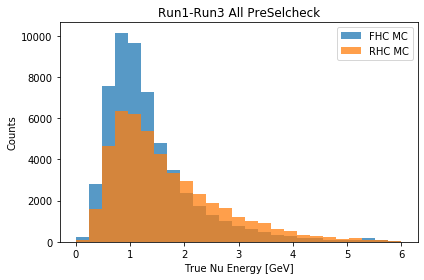

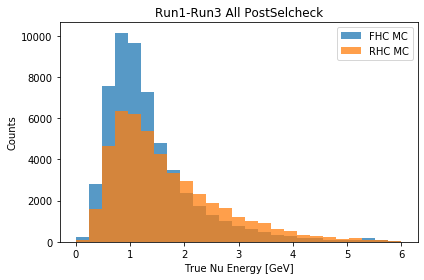

In [5]:
run1CSVNue     = "mc_run1_NuMI.csv"
run3CSVNue     = "mc_run3_NuMI.csv"
run1CSVNueBar  = "mc_run1_NuMIBar.csv"
run3CSVNueBar  = "mc_run3_NuMIBar.csv"

run1CSVNueCheck     = "mc_run1_NuMI_Check.csv"
run3CSVNueCheck     = "mc_run3_NuMI_Check.csv"
run1CSVNueBarCheck  = "mc_run1_NuMIBar_Check.csv"
run3CSVNueBarCheck  = "mc_run3_NuMIBar_Check.csv"

run1CSVNue1eNp = "mc_Sel_run1_1eNp_NuMI.csv"
run3CSVNue1eNp = "mc_Sel_run3_1eNp_NuMI.csv"
run1CSVNue1e0p = "mc_Sel_run1_1e0p_NuMI.csv"
run3CSVNue1e0p = "mc_Sel_run3_1e0p_NuMI.csv"
run1CSVNueBar1eNp = "mc_Sel_run1_1eNp_NuMIBar.csv"
run3CSVNueBar1eNp = "mc_Sel_run3_1eNp_NuMIBar.csv"
run1CSVNueBar1e0p = "mc_Sel_run1_1e0p_NuMIBar.csv"
run3CSVNueBar1e0p = "mc_Sel_run3_1e0p_NuMIBar.csv"



allRatio(run1CSVNue,run1CSVNueCheck,run3CSVNue,run3CSVNueCheck,nuType = "check")
#allRatio(run1CSVNueBar,run1CSVNueBarCheck,run3CSVNueBar,run3CSVNueBarCheck,nuType = "check")

'''
allRatio(run1CSVNue,run1CSVNue1eNp,run3CSVNue,run3CSVNue1eNp,nuType = "nue")
allRatio(run1CSVNueBar,run1CSVNueBar1eNp,run3CSVNueBar,run3CSVNueBar1eNp,nuType = "nuebar")
allRatio(run1CSVNue,run1CSVNue1e0p,run3CSVNue,run3CSVNue1e0p,nuType = "nue")
allRatio(run1CSVNueBar,run1CSVNueBar1e0p,run3CSVNueBar,run3CSVNueBar1e0p,nuType = "nuebar")
'''